## Supermarket

Supermarket merupakan toko retail bersekala menengah yang menjual berbagai macam barang. Pendapatan dan keuntungan dari Supermarket ditentukan dari berbagai faktor salah satunya Rating yang diberikan oleh Customer. Rating ini menunjukan tingkat kepuasan dari Customer yang menjadi Penilaian untuk Perusahaan. Toko dengan rating yang tinggi menjadi salah satu tolak ukur bagi Customer untuk memilih toko mana yang ingin dipilih, tentu saja hal ini mempengaruhi penjualan dan pendapatan yang dihasilkan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
# mengecek tipe data
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
# mengecek missing value
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Tidak ada Missing Value yang ditemukan pada dataset ini

In [6]:
# Describe data Numerik
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


#### Insight
Dari Describe data yang dilakukan diperoleh rata-rata Rating dari Supermarket ini yaitu 6.9
rating tertinggi yang diterima yaitu 10
rating terendah yang diterima 4

#### Problem
Rata-rata Rating yang diterima oleh Supermarket ini selama 3 bulan (Januari - Maret 2019) Termasuk Rendah, berdasarkan survey dari Youtpo. 
hal ini dapat mempengaruhi jumlah Customer

#### Goals
Meningkatkan Rating Supermarket agar dapat meningkatkan penjualan dan keuntungan


In [7]:
df['gross margin percentage'].nunique()

1

disini terlihat gross margin percentage hanya memiliki 1 unique value 
artinya Supermarket ini mengambil keuntungan sebesar 4.761905% dari setiap penjualan

In [8]:
# Desctibe data dari seluruh kolom
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice ID,1000,1000,764-44-8999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,1000,3,A,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1000,3,Yangon,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,1000,2,Member,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,1000,6,Fashion accessories,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,1000,NaN,NaN,NaN,55.6721,26.4946,10.08,32.875,55.23,77.935,99.96
Quantity,1000,NaN,NaN,NaN,5.51,2.92343,1,3,5,8,10
Tax 5%,1000,NaN,NaN,NaN,15.3794,11.7088,0.5085,5.92488,12.088,22.4452,49.65
Total,1000,NaN,NaN,NaN,322.967,245.885,10.6785,124.422,253.848,471.35,1042.65


##### Pengecekan Outliers dari data Rating

In [9]:
Q1 = df.describe()['Rating']['25%']
Q3 = df.describe()['Rating']['75%']
IQR = Q3 - Q1

In [10]:
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [11]:
df[(df['Rating'] < Lower_Fence) | (df['Rating'] > Upper_Fence)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


Tidak ada outliers pada Kolom Rating

### Ekstraksi Data

In [12]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df['Date'] = df['Date'] + ' ' + df['Time']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019 13:08,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019 10:29,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019 13:23,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019 20:33,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019 10:37,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
df.drop('Time', axis=1, inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019 13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019 10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019 13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019 20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019 10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
df['Date'] = df['Date'].astype('datetime64')

In [16]:
date = df['Date'].dt

In [17]:
df['Year'] = date.year
df['Month'] = date.month_name()
df['Time'] = date.hour
df['Day'] = date.day_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Time,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,January,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,March,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,March,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,January,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,February,10,Friday


In [38]:
df['gross income']=df['gross income'].round(3)


In [39]:
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Time,Day
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.142,9.1,2019,January,13,Saturday
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.820,9.6,2019,March,10,Friday
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.215,7.4,2019,March,13,Sunday
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.288,8.4,2019,January,20,Sunday
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.208,5.3,2019,February,10,Friday


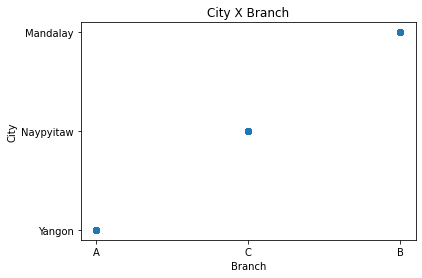

In [19]:
plt.scatter(df['Branch'], df['City'])
plt.title("City X Branch")
plt.xlabel("Branch")
plt.ylabel("City")
plt.show()

Melihat korelasi kolom City dan Branch yang ternyata keduanya memiliki korelasi dimana Branch atau cabang A berada di kota Yangon, cabang B berada di kota Mandalay, dan cabang C berada di kota Naypyitaw

In [20]:
# drop kolom Branch karena diwakilkan oleh kolom city
df.drop('Branch', axis=1, inplace=True)
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Time,Day
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,January,13,Saturday
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,March,10,Friday
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,March,13,Sunday
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,January,20,Sunday
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,February,10,Friday


In [21]:
pd.crosstab(index=df['Month'], columns='yey')

col_0,yey
Month,
February,303
January,352
March,345


In [22]:
pd.crosstab(index=df['Time'], columns='yey')

col_0,yey
Time,
10,101
11,90
12,89
13,103
14,83
15,102
16,77
17,74
18,93


In [23]:
pd.crosstab(index=df['City'], columns='yey')

col_0,yey
City,
Mandalay,332
Naypyitaw,328
Yangon,340


In [24]:
df[['gross income', 'Product line']].groupby('Product line').mean()

,gross income
Product line,
Electronic accessories,15.220597
Fashion accessories,14.528062
Food and beverages,15.365310
Health and beauty,15.411572
Home and lifestyle,16.030331
Sports and travel,15.812630


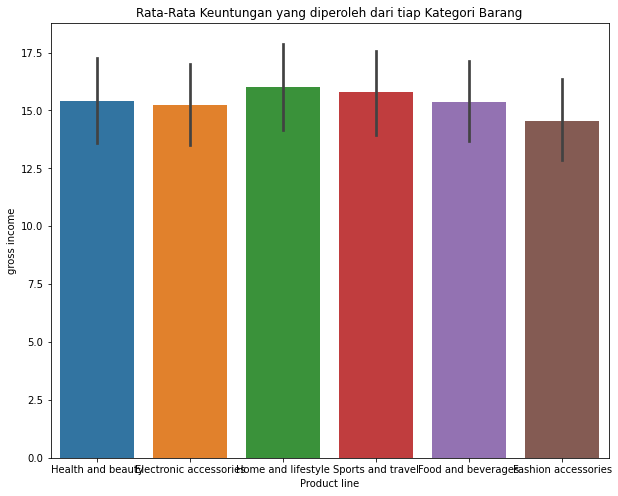

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product line', y='gross income', data=df)
plt.xlabel('Product line')
plt.ylabel('gross income')
plt.title('Rata-Rata Keuntungan yang diperoleh dari tiap Kategori Barang');

### Insight penjualan
Dari pengecekan data yang dilakukan diperoleh beberapa insight 
- Keuntungan paling banyak berasal dari produk Home and Lifestyle
- Keuntungan Paling rendah yaitu dari produk Fashion Accessories
- Transaksi tertinggi terjadi di cabang Kota Yangon
- Transaksi terendah terjadi di cabang Kota Naypyitaw
- Transaksi terjadi pada pukul 19 dan terendah pada pukul 20

In [26]:
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Time,Day
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,January,13,Saturday
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,March,10,Friday
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,March,13,Sunday
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,January,20,Sunday
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,February,10,Friday


In [27]:
df['gross income'].sum()

15379.368999999999

In [28]:
df['Rating'].mean()

6.972700000000003

In [29]:
rat_round = df['Rating'].round()
rat_round

0       9.0
1      10.0
2       7.0
3       8.0
4       5.0
       ... 
995     6.0
996     4.0
997     8.0
998     4.0
999     7.0
Name: Rating, Length: 1000, dtype: float64

In [30]:
pd.crosstab(index=rat_round, columns='Frekuensi Rating yang diterima dari Customer')

col_0,Frekuensi Rating yang diterima dari Customer
Rating,
4.0,102
5.0,133
6.0,193
7.0,159
8.0,179
9.0,141
10.0,93


C:\Users\Rafif Abdul Aziz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


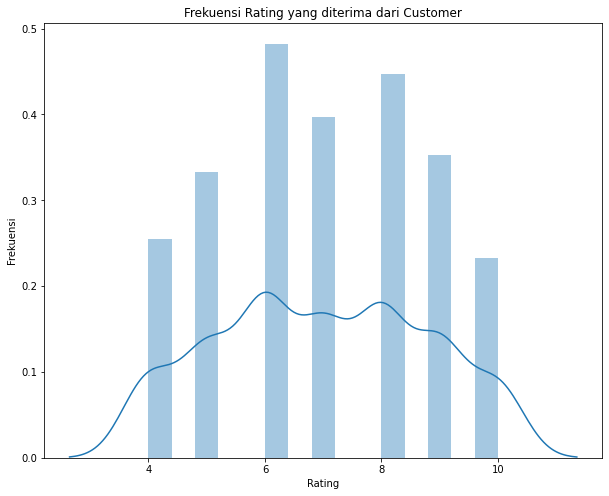

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(rat_round)
plt.title("Frekuensi Rating yang diterima dari Customer")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.show()

In [32]:
df[['City', 'Rating']].groupby('City').mean()

,Rating
City,
Mandalay,6.818072
Naypyitaw,7.072866
Yangon,7.027059


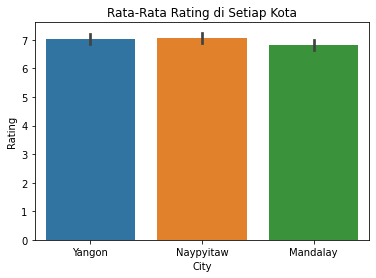

In [33]:
sns.barplot(x='City', y='Rating', data=df)
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Rata-Rata Rating di Setiap Kota');

In [34]:
df[['Customer type', 'Rating']].groupby('Customer type').mean()

,Rating
Customer type,
Member,6.940319
Normal,7.005210


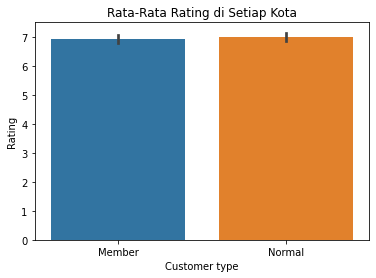

In [35]:
sns.barplot(x='Customer type', y='Rating', data=df)
plt.xlabel('Customer type')
plt.ylabel('Rating')
plt.title('Rata-Rata Rating di Setiap Kota');

In [36]:
df[['Month', 'Rating']].groupby('Month').mean()

,Rating
Month,
February,7.071287
January,7.017614
March,6.840290


In [40]:
df['gross income'].sum()

15379.365

### Insight
- berdasarkan frekuensi Rating yang diterima, Rating paling sedikit diperoleh yaitu rating 10 dengan jumlah 93
- Rating paling banyak diterima yaitu 6 dengan jumlah 193
- Rata - rata Rating yang diterima dari customer member lebih kecil (6.9) dibanding non member (7)
- Rata - rata Rating dari Supermarket di cabang kota Mandlay merupakan rating cabang terendah (6.8)
- Rata - rata Rating dari supermarket di cabang kota Naypyitaw merupakan yang tertinggi 
- Rata - rata rating yang diperoleh pada bulan Februari merupakan yang tertinggi yaitu 7.07
- Rata - rata rating pada bulan Maret merupakan yang terendah yaitu 6.8


### Recommendation

- Mengikutsertakan pegawai Supermarket yang berhubungan langsung dengan customer untuk mengikuti pelatihan Service Excellence
- Menaikan persentasi keuntungan (gross) dari setiap penjualan dari 4.76% menjadi 5% dengan menaikkan harga barang . 
    hal ini sebagai bayaran dari service yang telah di tingkatkan dengan pelatihan Service Excellence yg diadakan oleh Supermarket
- Memberikan pelayanan khusus bagi Customer dengan Membership yaitu berupa area Parkir khusus Member di area dekat pintu masuk dan Membership point setiap transaksi

### Impact 
- berdasarkan studi dari womply, toko dengan rating diatas 4 mendapaktakn 28% keuntungan lebih besar.
    dengan asumsi rating 4/5 ekuivalen dengan 8/10, sehingga apabila rata-rata rating toko naik menjadi 8/10 maka akan diperoleh
    kenaikan keuntungan sebesar 28% dari 15.379385 menjadi 19.685612.
